In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.metrics import geometric_mean_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/pattern project/drinking_dataset.csv')
dataset.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1,1,120,...,48,126,92,17.1,1,1.0,21,35,40,Y
1,Male,30,180,80,89.0,0.9,1.2,1,1,130,...,55,148,121,15.8,1,0.9,20,36,27,N
2,Male,40,165,75,91.0,1.2,1.5,1,1,120,...,41,74,104,15.8,1,0.9,47,32,68,N
3,Male,50,175,80,91.0,1.5,1.2,1,1,145,...,76,104,106,17.6,1,1.1,29,34,18,N
4,Male,50,165,60,80.0,1.0,1.2,1,1,138,...,61,117,104,13.8,1,0.8,19,12,25,N


In [ ]:
dataset.shape

(991346, 23)

In [ ]:
dataset.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                   int64
DBP                   int64
BLDS                  int64
tot_chole             int64
HDL_chole             int64
LDL_chole             int64
triglyceride          int64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST              int64
SGOT_ALT              int64
gamma_GTP             int64
DRK_YN               object
dtype: object

In [ ]:
n = 1
for (columnName, columnData) in dataset.iteritems():
    if columnData.dtype == 'O':
        print('S.no   : ', n)
        print('Name   : ', columnName)
        print('Unique : ', columnData.unique())
        print('No     : ',len(columnData.unique()))
        print()
        n+=1
    else:
        pass

<ipython-input-32-939197d42552>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in dataset.iteritems():


S.no   :  1
Name   :  sex
Unique :  ['Male' 'Female']
No     :  2

S.no   :  2
Name   :  DRK_YN
Unique :  ['Y' 'N']
No     :  2



In [ ]:
# Import necessary library
import pandas as pd

# Assuming 'dataset' is your DataFrame and 'class' is your target column
class1 = dataset[dataset['DRK_YN'] == 'Y']
class2 = dataset[dataset['DRK_YN'] == 'N']

# Randomly sample 15k data from each class
sampled_class1 = class1.sample(n=30000, random_state=1)
sampled_class2 = class2.sample(n=30000, random_state=1)

# Concatenate the two DataFrames
dataset= pd.concat([sampled_class1, sampled_class2])


print(dataset)

           sex  age  height  weight  waistline  sight_left  sight_right  \
443544    Male   55     165      65       79.0         1.0          1.2   
709129  Female   45     155      45       75.0         0.8          0.9   
807719    Male   35     170      65       91.0         0.9          1.0   
600957  Female   30     160      55       69.0         1.0          1.0   
54902     Male   45     165      75       90.7         1.2          0.9   
...        ...  ...     ...     ...        ...         ...          ...   
435729  Female   55     160      65       82.0         1.0          1.2   
127685  Female   60     140      50       77.0         0.7          0.7   
174446  Female   55     155      45       70.0         0.8          0.7   
14390   Female   45     155      70       98.8         0.7          0.6   
74710   Female   60     150      50       71.0         0.9          1.0   

        hear_left  hear_right  SBP  ...  HDL_chole  LDL_chole  triglyceride  \
443544          1   

In [ ]:
dataset.shape

(60000, 23)

In [ ]:
# Shuffle the DataFrame
dataset = dataset.sample(frac=1, random_state=1)

print(dataset)

           sex  age  height  weight  waistline  sight_left  sight_right  \
310803    Male   35     170      80       82.0         1.2          1.0   
308639  Female   50     150      55       76.0         1.0          0.8   
681908    Male   65     170      70       93.0         0.9          1.2   
314686    Male   35     180      85       84.0         1.5          1.5   
41380     Male   40     170      80       90.0         0.9          0.8   
...        ...  ...     ...     ...        ...         ...          ...   
398016  Female   45     160      45       60.0         0.9          1.0   
872908  Female   85     150      35       60.0         0.5          1.0   
565561  Female   75     145      55       99.0         0.5          0.7   
261110    Male   55     170      80       88.0         0.5          1.0   
227856  Female   40     160      55       81.0         1.5          1.5   

        hear_left  hear_right  SBP  ...  HDL_chole  LDL_chole  triglyceride  \
310803          1   

<ipython-input-36-ca99fd9a2186>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8,3,idx+1)


[]

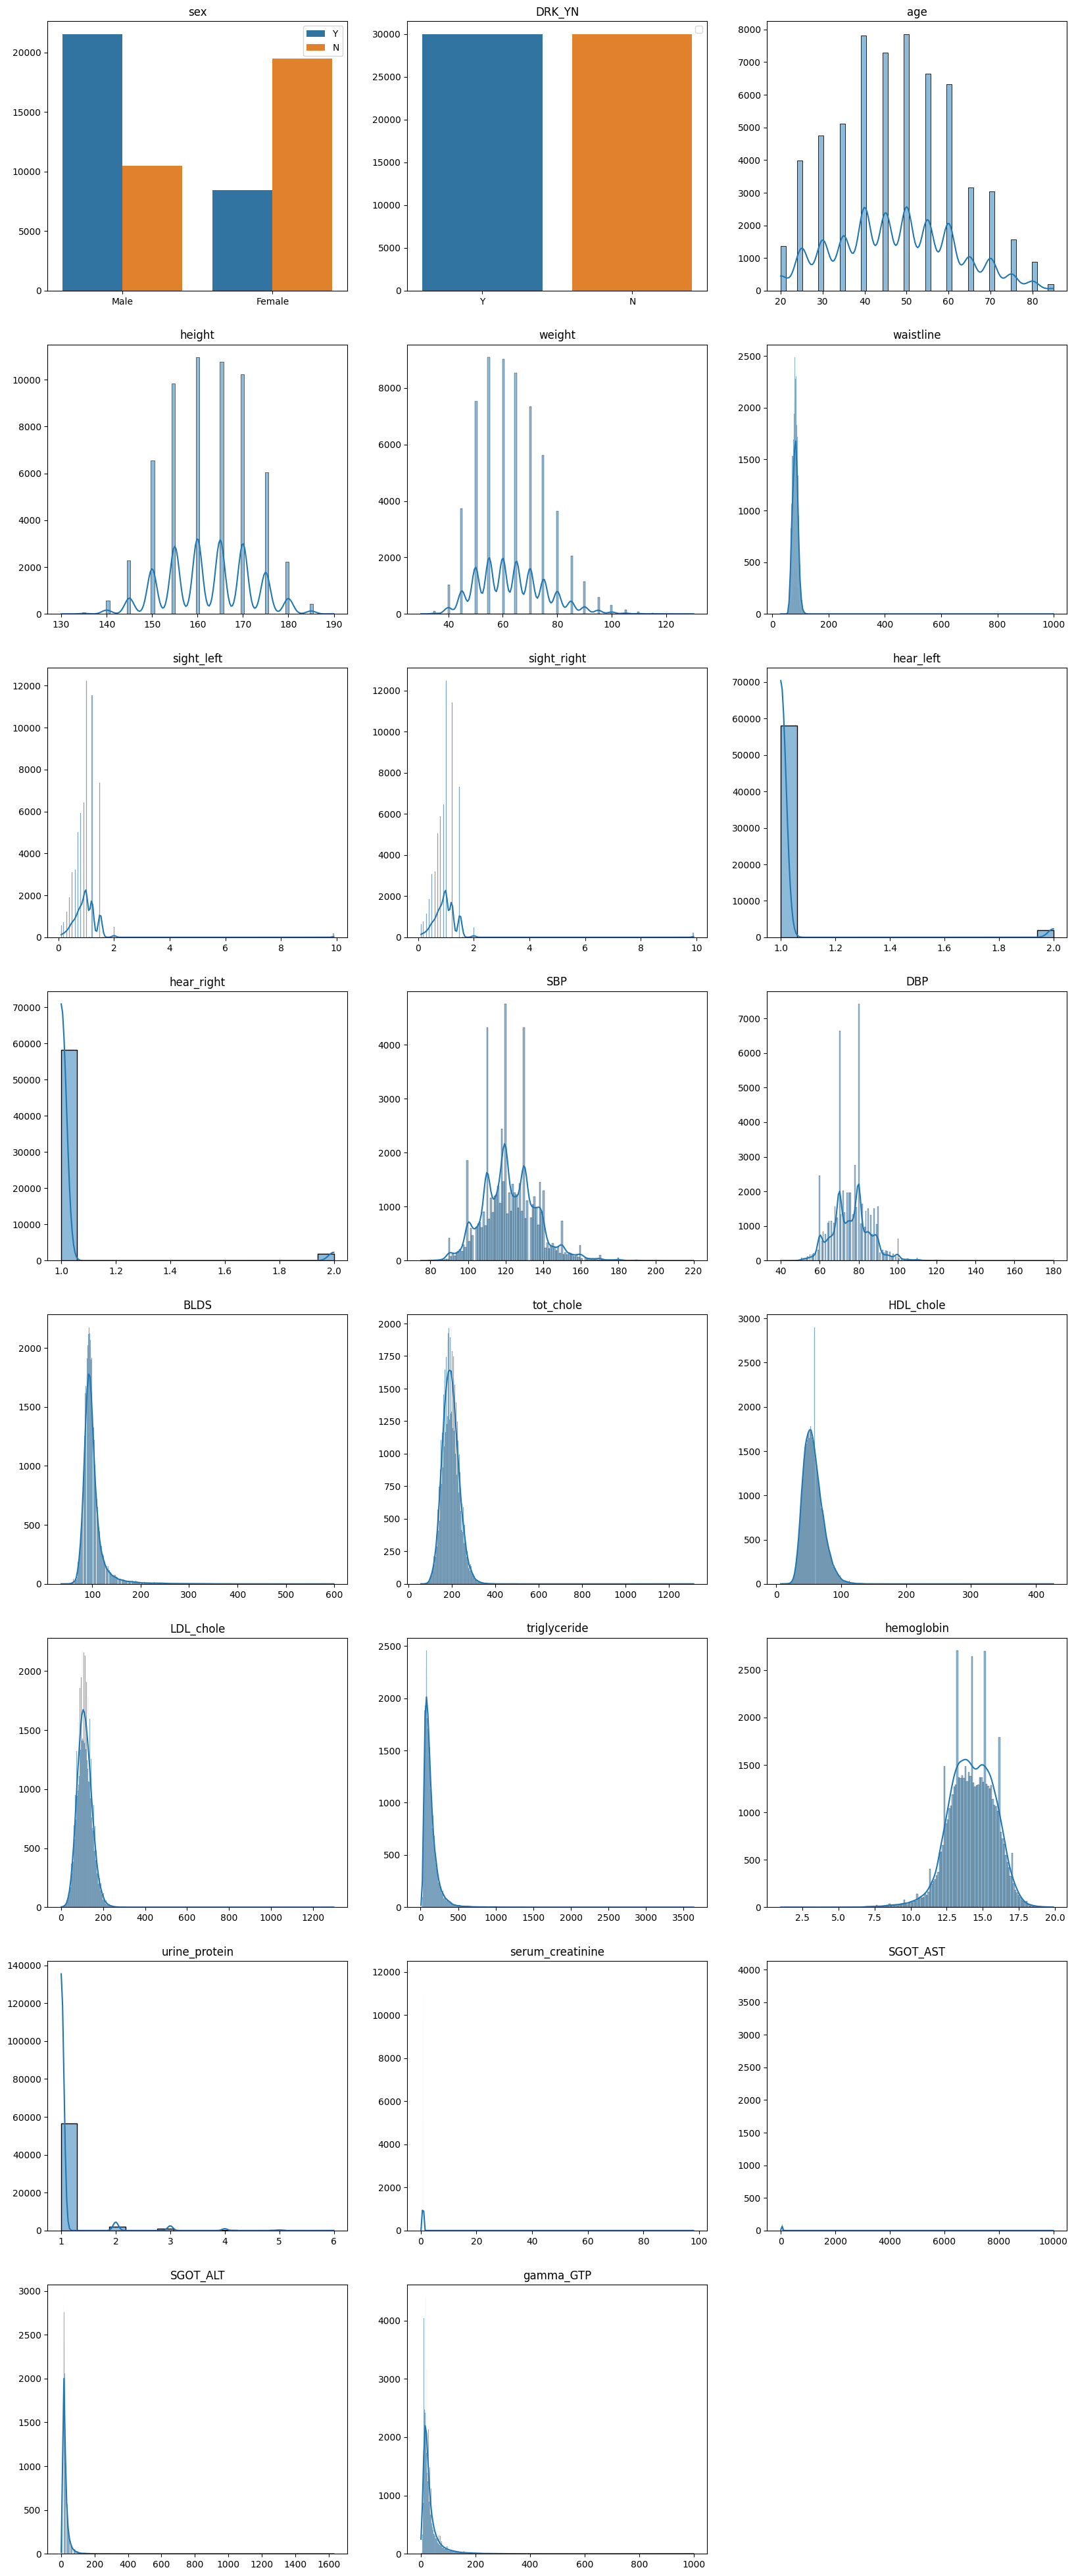

In [ ]:
object_cols = ['sex','DRK_YN']
num_cols = ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left','hear_right','SBP','DBP','BLDS','tot_chole','HDL_chole','LDL_chole','triglyceride','hemoglobin','urine_protein','serum_creatinine','SGOT_AST','SGOT_ALT','gamma_GTP']
fig,ax = plt.subplots(figsize = (20, 50))
idx = 0
for i in object_cols:
    plt.subplot(8,3,idx+1)
    sns.countplot(x = i, data = dataset, hue = dataset['DRK_YN'])
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title(i)
    plt.legend()
    idx += 1

for i in num_cols:
    plt.subplot(8,3,idx+1)
    sns.histplot(x = dataset[i],kde = True)
    plt.ylabel(None)
    plt.title(i)
    plt.xlabel(None)
    idx += 1

plt.plot()

In [ ]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['sex','DRK_YN']
num_cols = ['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'hear_left','hear_right','SBP','DBP','BLDS','tot_chole','HDL_chole','LDL_chole','triglyceride','hemoglobin','urine_protein','serum_creatinine','SGOT_AST','SGOT_ALT','gamma_GTP']

le = LabelEncoder()
for i in object_cols:
  dataset[i] = le.fit_transform(dataset[i])

dataset.head(5)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,DRK_YN
310803,1,35,170,80,82.0,1.2,1.0,1,1,89,...,30,137,283,15.2,1,1.0,24,29,15,1
308639,0,50,150,55,76.0,1.0,0.8,1,1,127,...,89,155,45,13.8,1,0.7,27,16,16,1
681908,1,65,170,70,93.0,0.9,1.2,1,1,136,...,49,125,141,14.8,1,1.4,17,20,24,0
314686,1,35,180,85,84.0,1.5,1.5,1,1,130,...,63,91,52,15.7,1,0.9,18,12,15,1
41380,1,40,170,80,90.0,0.9,0.8,1,1,130,...,38,97,203,15.4,1,0.8,36,53,23,1


In [ ]:
dataset.dtypes

sex                   int64
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left             int64
hear_right            int64
SBP                   int64
DBP                   int64
BLDS                  int64
tot_chole             int64
HDL_chole             int64
LDL_chole             int64
triglyceride          int64
hemoglobin          float64
urine_protein         int64
serum_creatinine    float64
SGOT_AST              int64
SGOT_ALT              int64
gamma_GTP             int64
DRK_YN                int64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 346389 to 412936
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               60000 non-null  int64  
 1   age               60000 non-null  int64  
 2   height            60000 non-null  int64  
 3   weight            60000 non-null  int64  
 4   waistline         60000 non-null  float64
 5   sight_left        60000 non-null  float64
 6   sight_right       60000 non-null  float64
 7   hear_left         60000 non-null  int64  
 8   hear_right        60000 non-null  int64  
 9   SBP               60000 non-null  int64  
 10  DBP               60000 non-null  int64  
 11  BLDS              60000 non-null  int64  
 12  tot_chole         60000 non-null  int64  
 13  HDL_chole         60000 non-null  int64  
 14  LDL_chole         60000 non-null  int64  
 15  triglyceride      60000 non-null  int64  
 16  hemoglobin        60000 non-null  

In [ ]:
# Assuming df is your DataFrame and selected_features is your list of selected features
selected_features = ['hemoglobin', 'sex', 'height', 'HDL_chole', 'age', 'gamma_GTP', 'SGOT_ALT', 'triglyceride', 'DBP', 'LDL_chole', 'weight', 'SGOT_AST', 'BLDS', 'urine_protein']

# Add the target variable 'class' to the list of selected features
selected_features.append('DRK_YN')

# Get all column names from the DataFrame
all_features = dataset.columns.tolist()

# Find the features to drop
features_to_drop = [feature for feature in all_features if feature not in selected_features]

# Drop the features
dataset = dataset.drop(columns=features_to_drop)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 310803 to 227856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sex            60000 non-null  int64  
 1   age            60000 non-null  int64  
 2   height         60000 non-null  int64  
 3   weight         60000 non-null  int64  
 4   DBP            60000 non-null  int64  
 5   BLDS           60000 non-null  int64  
 6   HDL_chole      60000 non-null  int64  
 7   LDL_chole      60000 non-null  int64  
 8   triglyceride   60000 non-null  int64  
 9   hemoglobin     60000 non-null  float64
 10  urine_protein  60000 non-null  int64  
 11  SGOT_AST       60000 non-null  int64  
 12  SGOT_ALT       60000 non-null  int64  
 13  gamma_GTP      60000 non-null  int64  
 14  DRK_YN         60000 non-null  int64  
dtypes: float64(1), int64(14)
memory usage: 7.3 MB


PCA

Shape of transformed training data: (48000, 2)
Shape of transformed test data: (12000, 2)
Explained variance ratio: [0.25545737 0.12283973]


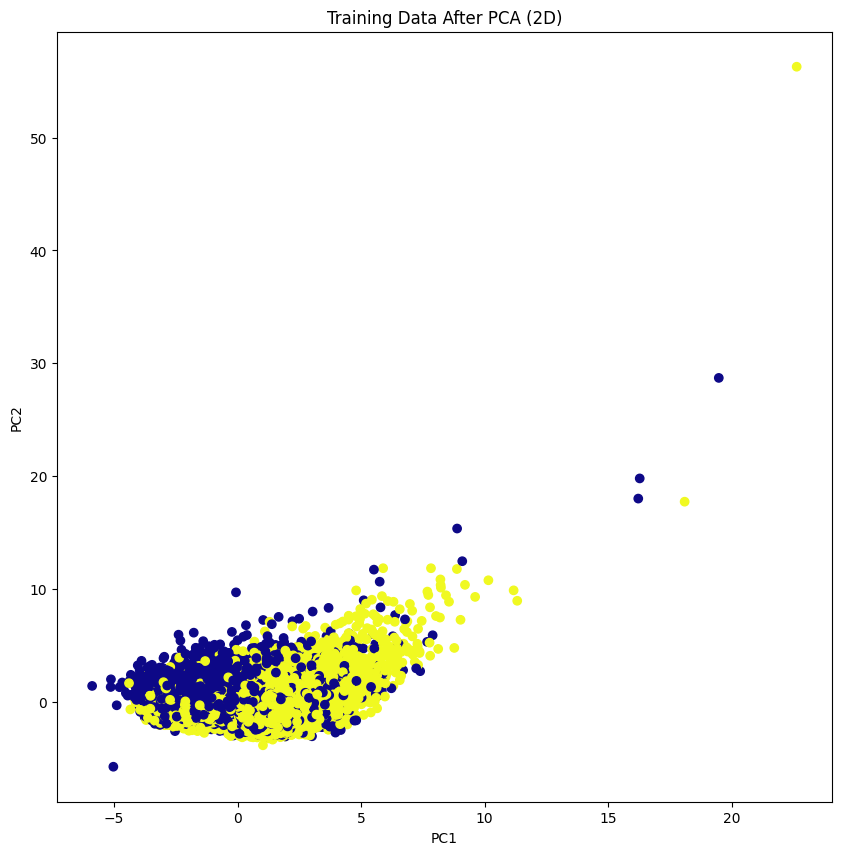

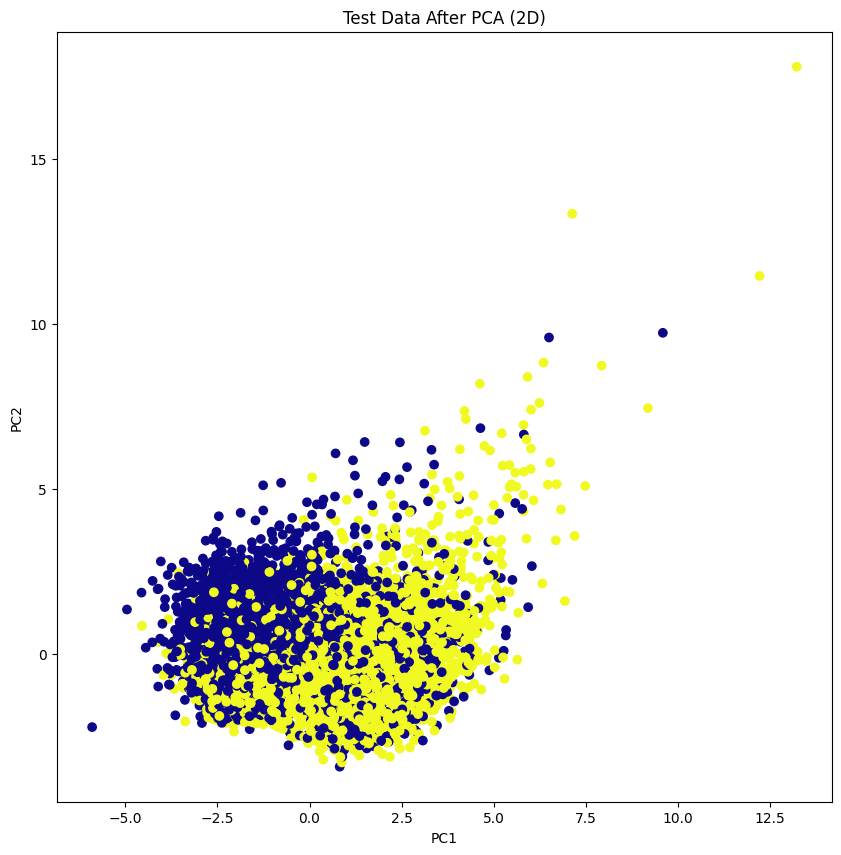

In [ ]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Your features and target
X = dataset[['hemoglobin', 'sex', 'height', 'HDL_chole', 'age', 'gamma_GTP', 'SGOT_ALT', 'triglyceride', 'DBP', 'LDL_chole', 'weight', 'SGOT_AST', 'BLDS', 'urine_protein']]
Y = dataset['DRK_YN']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

# Scale data before applying PCA
scaling = StandardScaler()
scaling.fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

# Set the n_components=2
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Check the dimensions of data after PCA
print(f'Shape of transformed training data: {X_train_pca.shape}')
print(f'Shape of transformed test data: {X_test_pca.shape}')

# Print the explained variance ratio
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

# 2D plot for training data
plt.figure(figsize=(10,10))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Training Data After PCA (2D)')
plt.show()

# 2D plot for test data
plt.figure(figsize=(10,10))
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Test Data After PCA (2D)')
plt.show()


LDA

**TSNE**

Shape of transformed training data: (48000, 2)
Shape of transformed test data: (12000, 2)


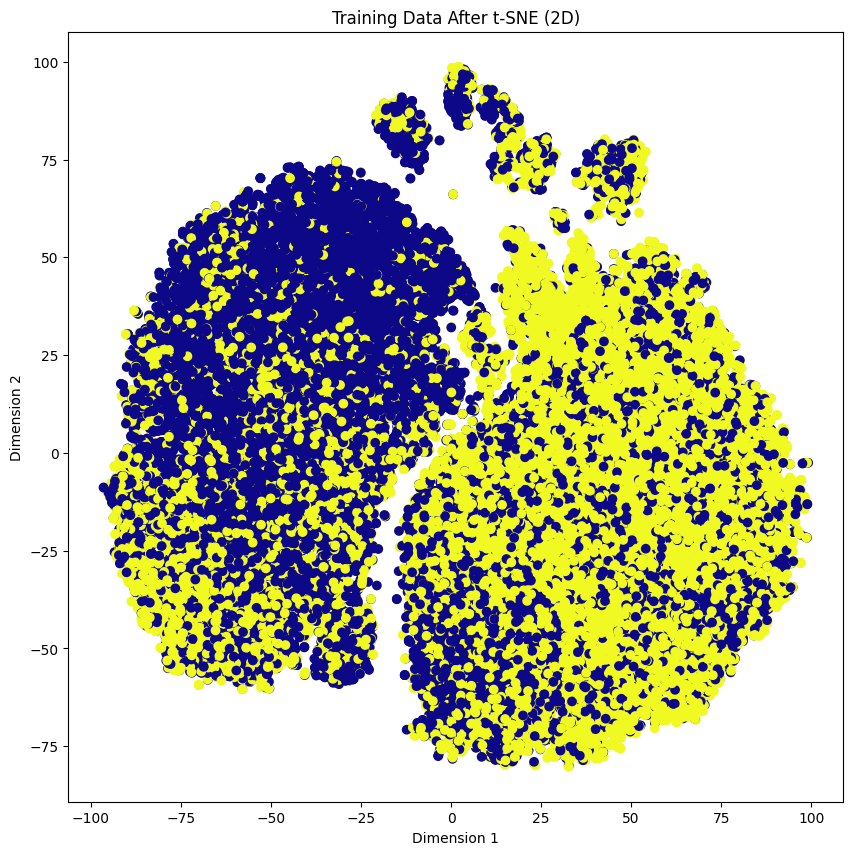

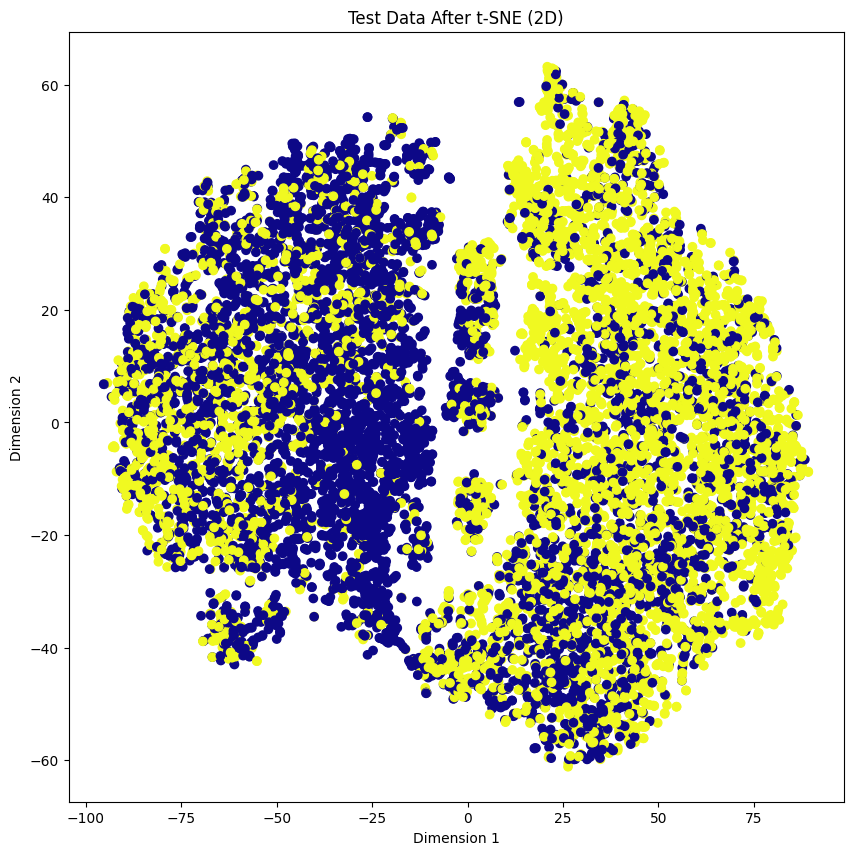

In [ ]:
# Import necessary libraries
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Your features and target
X = dataset[['sex', 'age', 'height', 'weight', 'DBP', 'BLDS', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']]
Y = dataset['DRK_YN']
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

# Scale data before applying t-SNE
scaling = StandardScaler()
scaling.fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

# Set the n_components=2
tsne = TSNE(n_components=2)
X_train = tsne.fit_transform(X_train_scaled)
X_test = tsne.fit_transform(X_test_scaled)

# Check the dimensions of data after t-SNE
print(f'Shape of transformed training data: {X_train.shape}')
print(f'Shape of transformed test data: {X_test.shape}')

# 2D plot for training data
plt.figure(figsize=(10,10))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='plasma')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Training Data After t-SNE (2D)')
plt.show()

# 2D plot for test data
plt.figure(figsize=(10,10))
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='plasma')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Test Data After t-SNE (2D)')
plt.show()

LR

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score:  0.7261666666666666
F1 score:  0.7258468212915068
Precision score:  0.725
Recall score:  0.7266956231206148


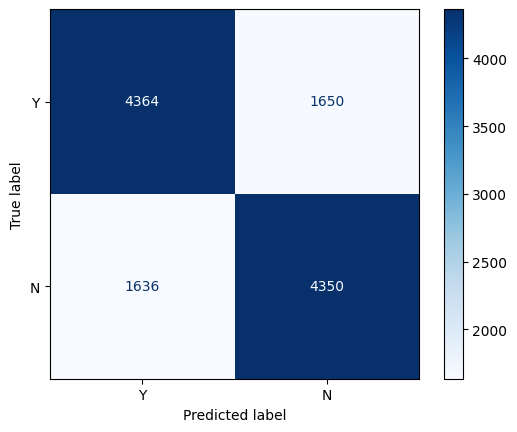

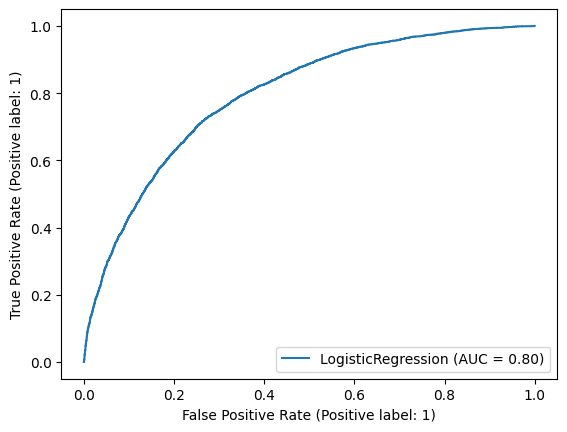

In [ ]:
clf = LogisticRegression(C=1.0, solver='lbfgs', max_iter=1000, class_weight='balanced', random_state=0).fit(X_train, y_train)
Y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Y','N'])

cmd.plot(cmap=plt.cm.Blues)

print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

SVM

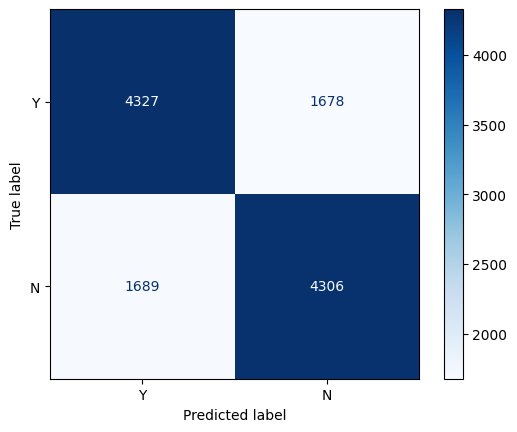

Accuracy score:  0.7194166666666667
F1 score:  0.7189247850404875
Precision score:  0.7195855614973262
Recall score:  0.7182652210175146


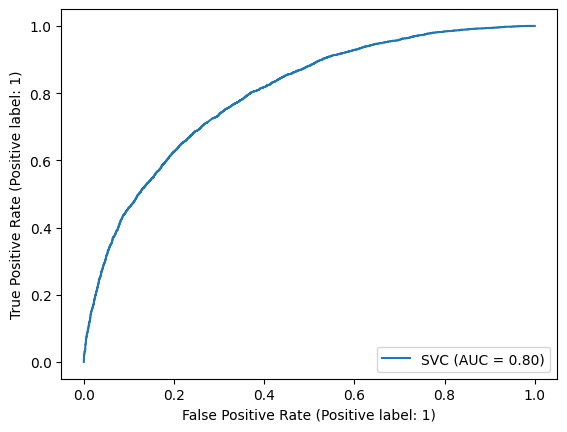

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay

# Fit the model
clf = SVC(C=1.0, kernel='rbf', class_weight='balanced', random_state=0, probability=True)
clf.fit(X_train, y_train)

# Make predictions
Y_pred = clf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Y','N'])

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Print scores
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Plot ROC curve
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

KNN

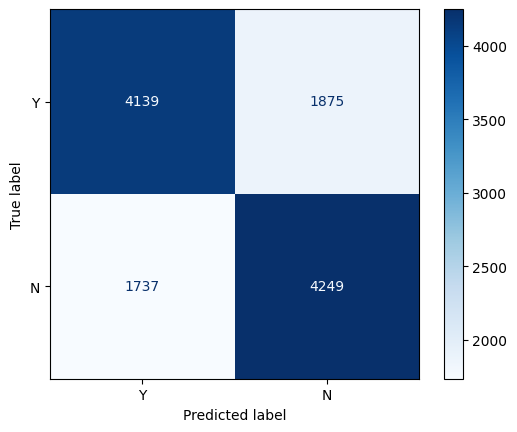

Accuracy score:  0.699
F1 score:  0.7017341040462427
Precision score:  0.6938275636838668
Recall score:  0.7098229201470097


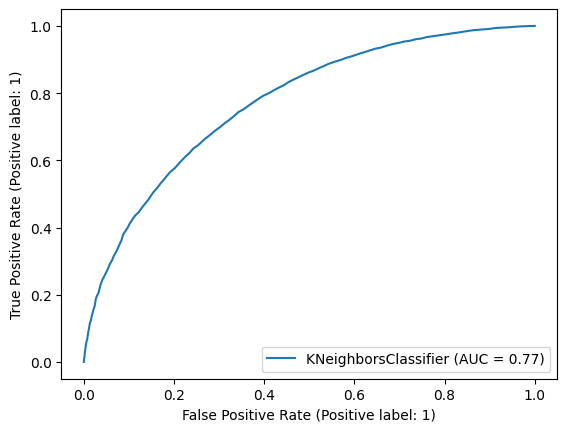

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay

# Fit the model
clf = KNeighborsClassifier(n_neighbors=173)
clf.fit(X_train, y_train)

# Make predictions
Y_pred = clf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Y','N'])

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Print scores
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Plot ROC curve
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()


Naive Bayes

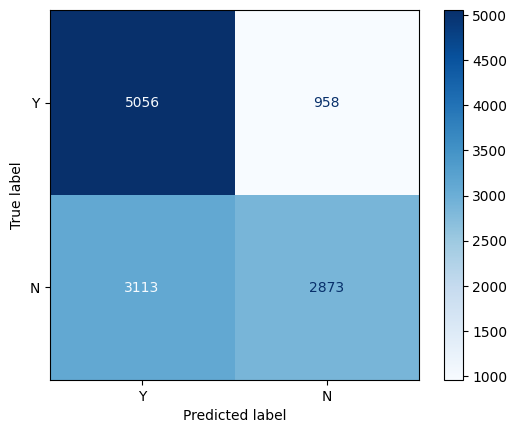

Accuracy score:  0.66075
F1 score:  0.5853111948660487
Precision score:  0.7499347428869747
Recall score:  0.47995322418977615


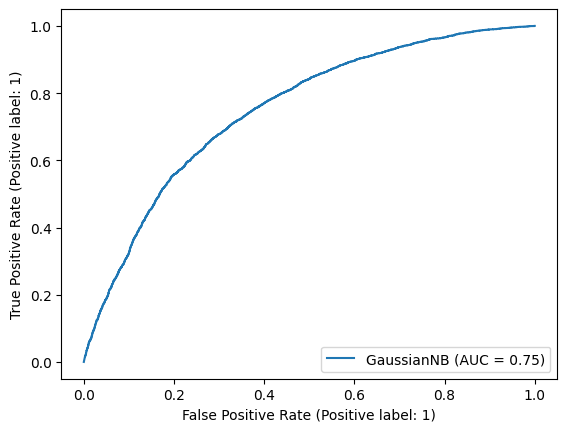

In [ ]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay

# Fit the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions
Y_pred = clf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Y','N'])

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Print scores
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Plot ROC curve
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()


XGBoost

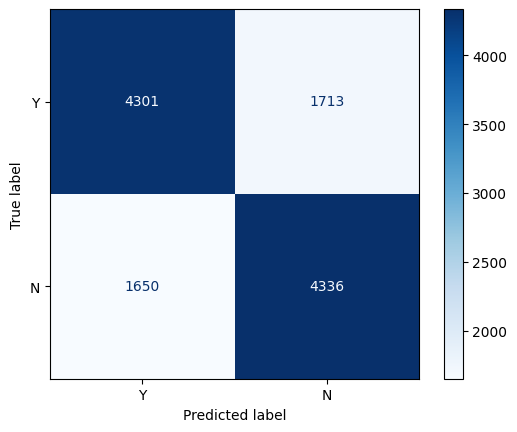

Accuracy score:  0.71975
F1 score:  0.7205650186954714
Precision score:  0.7168126963134402
Recall score:  0.724356832609422


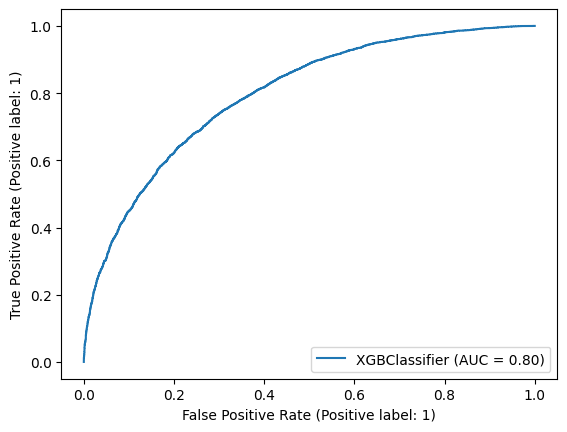

In [ ]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay

# Fit the model
clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
clf.fit(X_train, y_train)

# Make predictions
Y_pred = clf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Y','N'])

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Print scores
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Plot ROC curve
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()


random forest

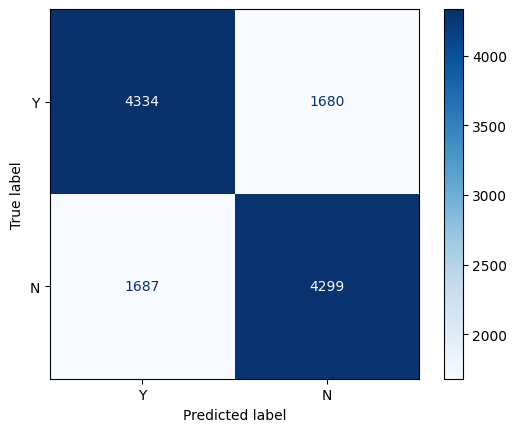

Accuracy score:  0.7194166666666667
F1 score:  0.7185959047221061
Precision score:  0.7190165579528349
Recall score:  0.7181757434012697


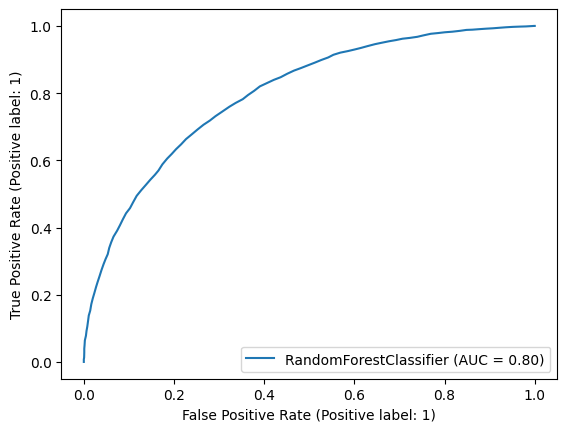

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay

# Fit the model
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=0)
clf.fit(X_train, y_train)

# Make predictions
Y_pred = clf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Y','N'])

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Print scores
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Plot ROC curve
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

adaboost

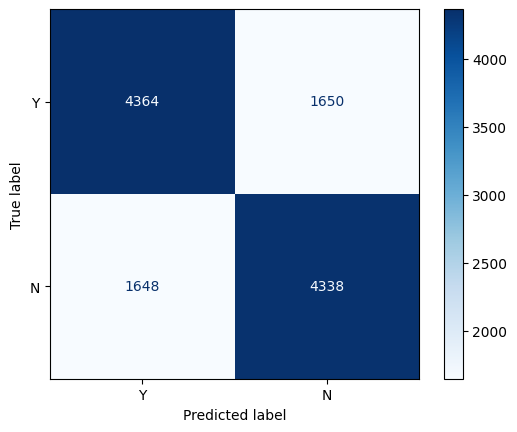

Accuracy score:  0.7251666666666666
F1 score:  0.7245699014531485
Precision score:  0.7244488977955912
Recall score:  0.7246909455395923


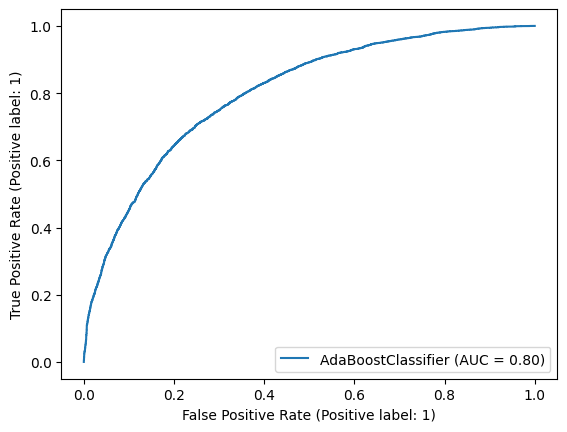

In [ ]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay

# Fit the model
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

# Make predictions
Y_pred = clf.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Y','N'])

# Plot confusion matrix
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Print scores
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))

# Plot ROC curve
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()


Shape of transformed training data: (48000, 1)
Shape of transformed test data: (12000, 1)


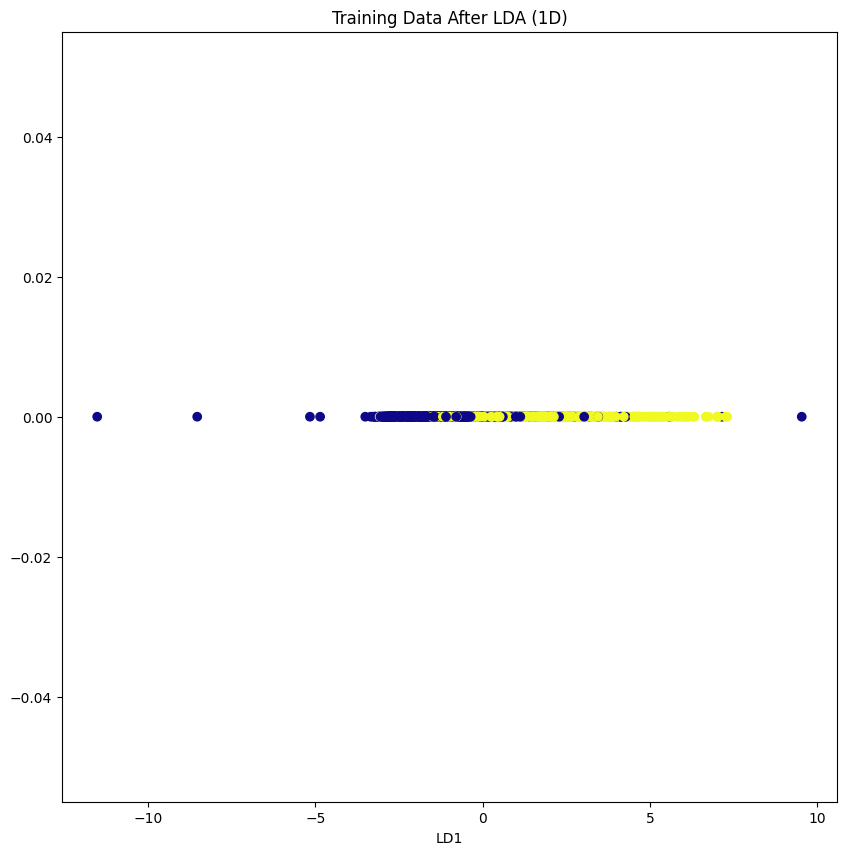

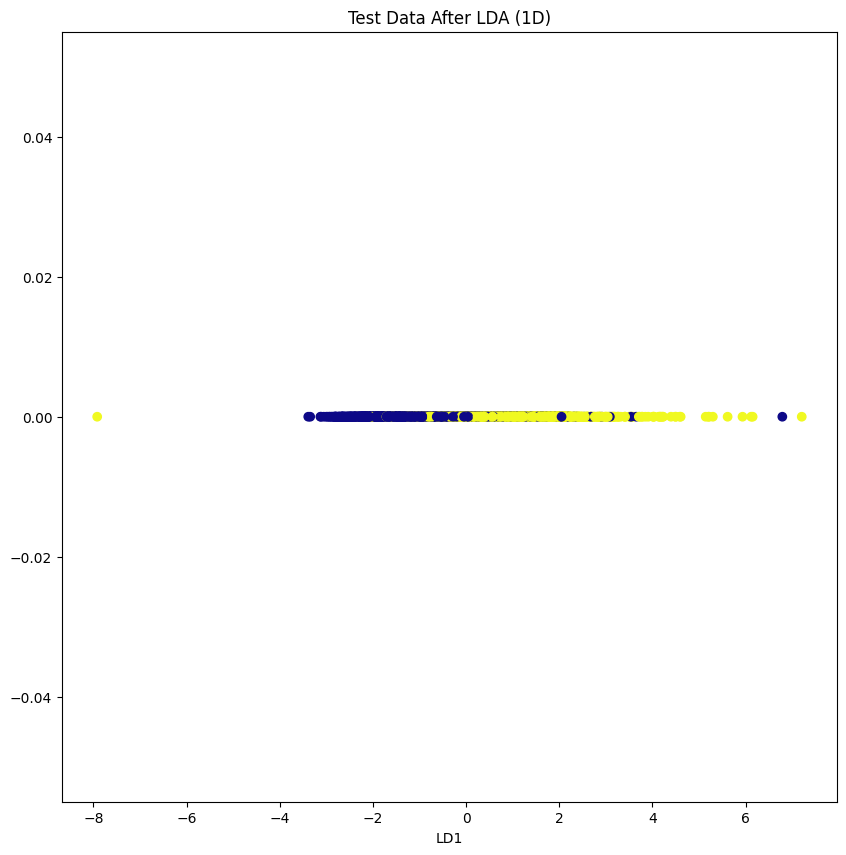

In [ ]:
# Import necessary libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Your features and target
X = dataset[['sex', 'age', 'height', 'weight', 'DBP', 'BLDS', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']]
Y = dataset['DRK_YN']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

# Scale data before applying LDA
scaling = StandardScaler()
scaling.fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

# Set the n_components=1 (LDA can only reduce to at most n_classes-1 dimensions)
lda = LDA(n_components=1)
lda.fit(X_train_scaled, y_train)
X_train_lda = lda.transform(X_train_scaled)
X_test_lda = lda.transform(X_test_scaled)

# Check the dimensions of data after LDA
print(f'Shape of transformed training data: {X_train_lda.shape}')
print(f'Shape of transformed test data: {X_test_lda.shape}')

# 1D plot for training data
plt.figure(figsize=(10,10))
plt.scatter(X_train_lda[:,0], np.zeros_like(X_train_lda[:,0]), c=y_train, cmap='plasma')
plt.xlabel('LD1')
plt.title('Training Data After LDA (1D)')
plt.show()

# 1D plot for test data
plt.figure(figsize=(10,10))
plt.scatter(X_test_lda[:,0], np.zeros_like(X_test_lda[:,0]), c=y_test, cmap='plasma')
plt.xlabel('LD1')
plt.title('Test Data After LDA (1D)')
plt.show()

LDA